<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/estad%C3%ADstica/stadisticas_correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [31]:
data_ads = pd.read_csv('/content/Advertising.csv')
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [3]:
len(data_ads)

200

In [4]:
import numpy as np

In [5]:
data_ads['corrn'] = (data_ads['TV'] - np.mean(data_ads['TV'])) * (data_ads['Sales'] - np.mean(data_ads['Sales']))

In [6]:
data_ads.head(3)

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206


In [7]:
data_ads['corr1'] = (data_ads['TV'] - np.mean(data_ads['TV']))**2

In [8]:
data_ads['corr2'] = (data_ads['Sales'] - np.mean(data_ads['Sales'])) **2

In [9]:
corr_pearson = sum(data_ads['corrn']) / np.sqrt(sum(data_ads['corr1'])* sum(data_ads['corr2']))

In [10]:
corr_pearson

0.782224424861606

In [11]:
# Calcular el coeficiente de correlacion entre 2 variables
def corr_coeff(df, var1, var2):
  df['corrn'] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
  df['corr1'] = (df[var1] - np.mean(df[var1]))**2
  df['corr2'] = (df[var2] - np.mean(df[var2]))**2
  corr_pearson = sum(df['corrn']) / np.sqrt(sum(df['corr1'])* sum(df['corr2']))

  return corr_pearson

In [12]:
corr_coeff(data_ads, 'TV', 'Sales')

0.782224424861606

In [13]:
corr_coeff(data_ads, 'Radio', 'Sales')

0.576222574571055

In [17]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [18]:
for x in cols:
  for y in cols:
    print(x + ', '+ y + ': ' + str(corr_coeff(data_ads, x, y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583006
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583006
Radio, Radio: 1.0
Radio, Newspaper: 0.35410375076117545
Radio, Sales: 0.576222574571055
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.35410375076117545
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616534
Sales, TV: 0.782224424861606
Sales, Radio: 0.576222574571055
Sales, Newspaper: 0.22829902637616534
Sales, Sales: 1.0


In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Venta del Producto')

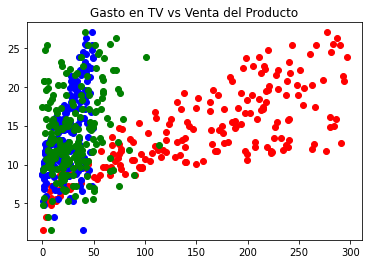

In [29]:
plt.plot(data_ads['TV'], data_ads['Sales'], 'ro')
plt.plot(data_ads['Radio'], data_ads['Sales'], 'bo')
plt.plot(data_ads['Newspaper'], data_ads['Sales'], 'go')
plt.title('Gasto en TV vs Venta del Producto')

In [32]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


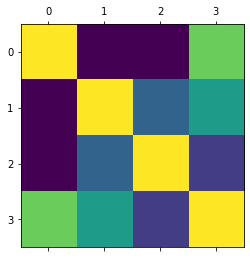

In [33]:
plt.matshow(data_ads.corr())